In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:\\Users\\Chintan\\OneDrive\\Desktop\\data_clean2.csv", delimiter=" ", skipinitialspace=True)
df.dropna(subset=['Age'], inplace=True)
df.describe

<bound method NDFrame.describe of      Output  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0        -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1         1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2        -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3         1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4        -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
..      ...          ...       ...            ...            ...       ...   
763       1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764       1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765       1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766      -1    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767       1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigr

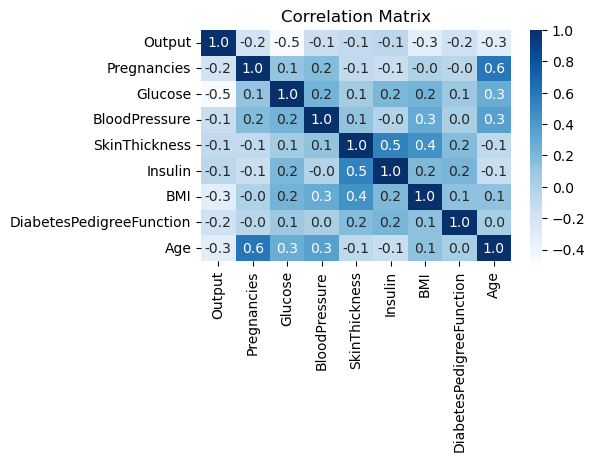

In [2]:
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".1f", linecolor='black')
plt.title('Correlation Matrix')
plt.show()

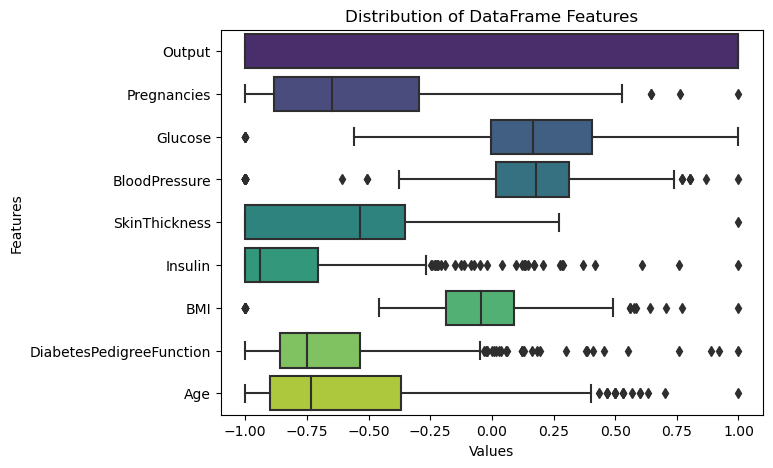

In [18]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, orient='h', palette='viridis')
plt.title('Distribution of DataFrame Features')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()


In [22]:
def initialize_parameters(num_features):
    return np.random.randn(num_features + 1) * 0.01

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

def make_prediction(params, x):
    activation = logistic_function(np.dot(params, x))
    
    return 1 if activation >= 0.3 else -1

def sgd_momentum(X_train, y_train, learning_rate=0.005, num_epochs=200, momentum=0.9):
    num_features = X_train.shape[1]
    params = initialize_parameters(num_features)
    
    velocity = np.zeros(num_features + 1)
    
    print(f"The learning rate is: {learning_rate}")
    
    for epoch in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)  
            y_pred = make_prediction(params, x)
            error = y_train[i] - y_pred
            
            grad = -error * x
            
            velocity = momentum * velocity - learning_rate * grad
            
            params = params + velocity
            
    return params

def sgd_adaptive(X_train, y_train, learning_rate=0.005, num_epochs=200):
    num_features = X_train.shape[1]
    params = initialize_parameters(num_features)
    
    grad_squares = np.zeros(num_features + 1)
    
    epsilon = 1e-7
    
    print(f"Using this learning rate: {learning_rate}")
    
    for epoch in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)
            y_pred = make_prediction(params, x)
            error = y_train[i] - y_pred
            
            grad = -error * x
            
            grad_squares += grad ** 2
            
            params = params - (learning_rate / (np.sqrt(grad_squares + epsilon))) * grad
    
    return params


In [23]:
X = df.drop('Output', axis=1)
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)
model_1 = sgd_momentum(X_train.values, y_train.values, learning_rate=0.005, num_epochs=1500, momentum=0.8)
y_pred1 = [make_prediction(model_1, np.insert(x, 0, 1)) for x in X_test.values]
model_2 = sgd_adaptive(X_train.values, y_train.values, learning_rate=0.005, num_epochs=1500)
y_pred2 = [make_prediction(model_2, np.insert(x, 0, 1)) for x in X_test.values]


The learning rate is: 0.005
Using this learning rate: 0.005


Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

    Negative       0.40      0.87      0.55        76
    Positive       0.84      0.35      0.49       152

    accuracy                           0.52       228
   macro avg       0.62      0.61      0.52       228
weighted avg       0.69      0.52      0.51       228



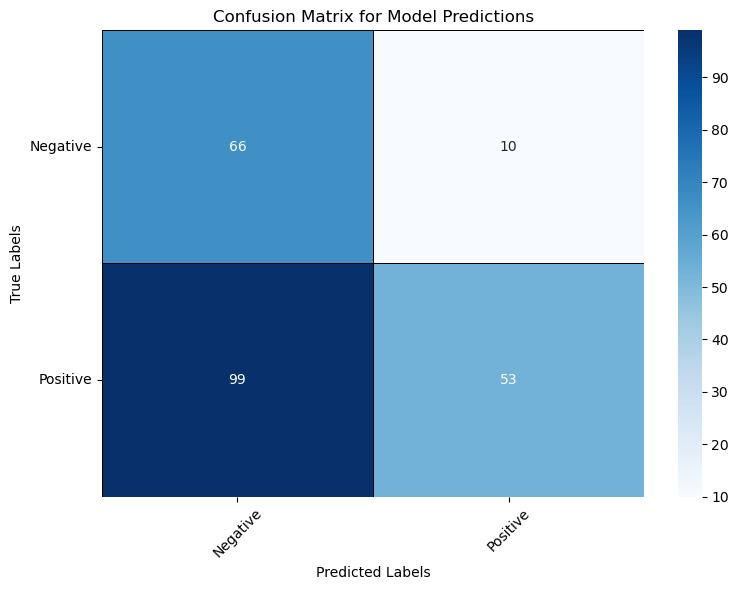

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
class_labels = ["Negative", "Positive"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for Model Predictions')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred1, target_names=class_labels)
print('\nClassification Report:\n', class_report)

plt.show()


Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.50      0.55        76
    Positive       0.77      0.84      0.81       152

    accuracy                           0.73       228
   macro avg       0.69      0.67      0.68       228
weighted avg       0.72      0.73      0.72       228



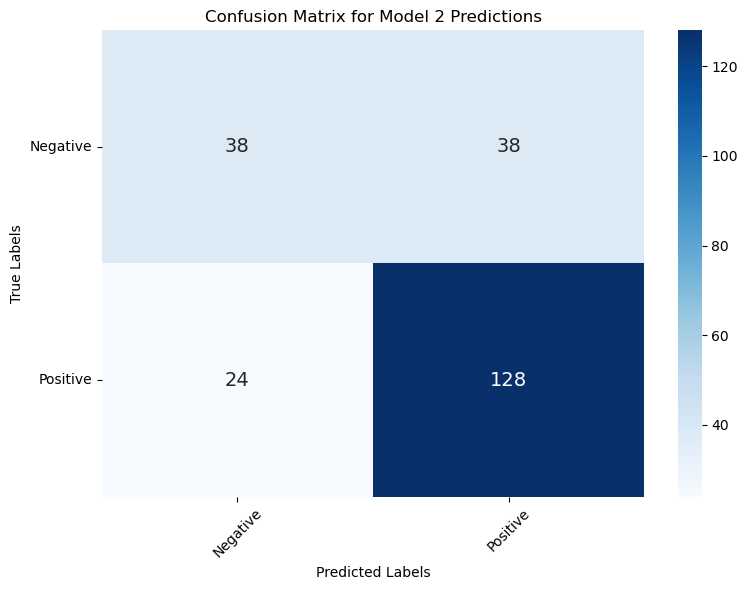

In [25]:
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_labels = ["Negative", "Positive"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})
plt.title('Confusion Matrix for Model 2 Predictions')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred2, target_names=class_labels)
print('\nClassification Report:\n', class_report)

plt.show()


Epoch - 10 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 100 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 500 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 1000 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 2000 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 3000 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 5000 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 8000 with learning rate 0.001
Using this learning rate: 0.001
Epoch - 10000 with learning rate 0.001
Using this learning rate: 0.001


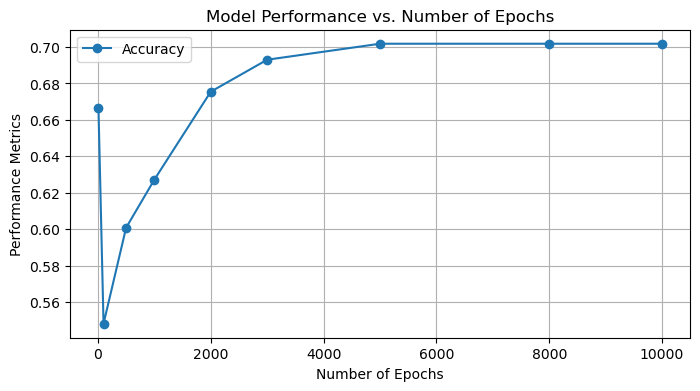

In [26]:
performance_metrics = {'epochs': [], 'accuracy': [], 'f1_score': []}

learning_rate = 0.001
num_epochs_list = [10, 100, 500, 1000, 2000, 3000, 5000, 8000, 10000]

for num_epochs in num_epochs_list:
    print(f"Epoch - {num_epochs} with learning rate {learning_rate}")
    model_params = sgd_adaptive(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
    y_pred = [make_prediction(model_params, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performance_metrics['epochs'].append(num_epochs)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['f1_score'].append(f1)

plt.figure(figsize=(8, 4))
plt.plot(performance_metrics['epochs'], performance_metrics['accuracy'], marker='o', label='Accuracy')
plt.title('Model Performance vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()

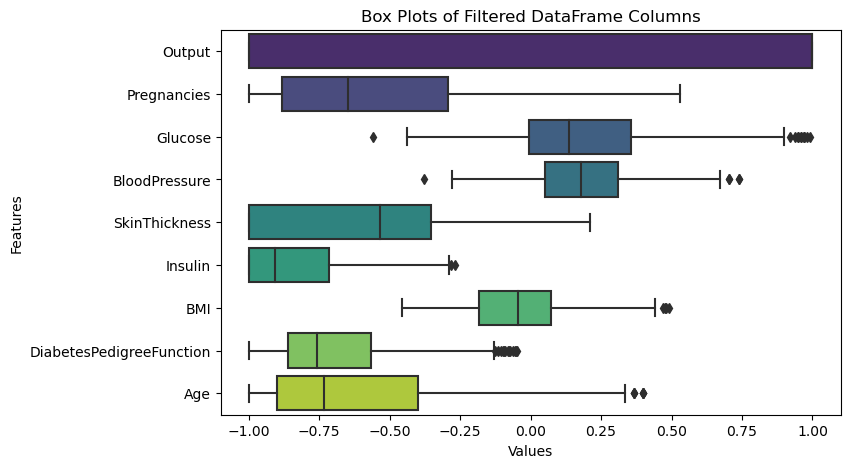

In [27]:
def remove_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]    
    return df_filtered

df2 = remove_outliers_iqr(df)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, orient='h', palette='viridis')  
plt.title('Box Plots of Filtered DataFrame Columns')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler

X = df2.drop('Output', axis=1)
y = df2['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_params = sgd_momentum(X_train_scaled, y_train.values, learning_rate=0.002, num_epochs=15000, momentum=0.85)
y_pred = [make_prediction(model_params, np.insert(x, 0, 1)) for x in X_test_scaled]



The learning rate is: 0.002


Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.43      0.49        76
    Positive       0.75      0.84      0.79       152

    accuracy                           0.70       228
   macro avg       0.66      0.63      0.64       228
weighted avg       0.69      0.70      0.69       228



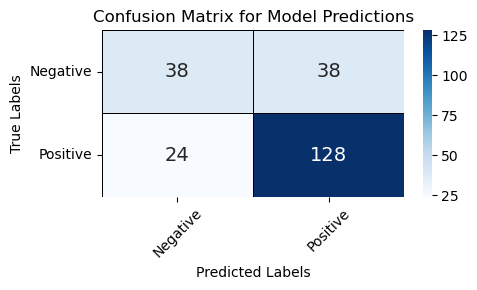

In [28]:
accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Negative", "Positive"]

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black', annot_kws={"size": 14})
plt.title('Confusion Matrix for Model Predictions')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred, target_names=class_labels)
print('\nClassification Report:\n', class_report)
plt.show()